In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.colors as mcolors

import random
import re   
import string                          

import nltk
from nltk.corpus import twitter_samples
from nltk.corpus import stopwords          
from nltk.stem import PorterStemmer        
from nltk.tokenize import TweetTokenizer

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [26]:
# Load Data
data = pd.read_excel('Test_set_refined.xlsx')

In [27]:
data.head()

,Start Time,End Time,Sentence,Corrected Sentence,Translation,Emotion,Intensity
0,"00:00:00,000","00:00:15,000",Ð¡Ð¾Ñ„Ð¸Ñ. Ð’ Ð¶Ð¸Ð»Ð¸Ñ‰ÐµÐ½ ÐºÐ¾Ð¼Ð¿Ð»ÐµÐºÑ...,Ð¡Ð¾Ñ„Ð¸Ñ. Ð’ Ð¶Ð¸Ð»Ð¸Ñ‰ÐµÐ½ ÐºÐ¾Ð¼Ð¿Ð»ÐµÐºÑ...,Sofia. Lilyana Georgieva and her 13-year-old d...,neutral,neutral
1,"00:00:15,000","00:00:22,000",ÐžÑ‚ÐºÐ°ÐºÑ‚Ð¾ Ð±Ð°Ñ‰Ð°Ñ‚Ð° Ð½Ð° Ð’ÐµÐ»Ð¸Ð½Ð° ...,ÐžÑ‚ÐºÐ°ÐºÑ‚Ð¾ Ð±Ð°Ñ‰Ð°Ñ‚Ð° Ð½Ð° Ð’ÐµÐ»Ð¸Ð½Ð° ...,Ever since Velina's father abandoned her famil...,sadness,moderate
2,"00:00:22,000","00:00:27,000","ÐŸÐ¾Ñ‡Ñ‚Ð¸ Ð½ÑÐ¼Ð° Ð¶ÐµÐ»Ð°Ð½Ð¸Ðµ, ÐºÐ¾ÐµÑ‚Ð¾...","ÐŸÐ¾Ñ‡Ñ‚Ð¸ Ð½ÑÐ¼Ð° Ð¶ÐµÐ»Ð°Ð½Ð¸Ðµ, ÐºÐ¾ÐµÑ‚Ð¾...",There is almost no desire that Liliana does no...,caring,intense
3,"00:00:27,000","00:00:35,000",Ð’ÐµÐ»Ð¸Ð½Ð° Ð¼Ð½Ð¾Ð³Ð¾ Ñ‚ÐµÐ¶ÐºÐ¾ Ð¿Ñ€ÐµÐ¶Ð¸Ð...,Ð’ÐµÐ»Ð¸Ð½Ð° Ð¼Ð½Ð¾Ð³Ð¾ Ñ‚ÐµÐ¶ÐºÐ¾ Ð¿Ñ€ÐµÐ¶Ð¸Ð...,Velina has a very difficult time to make a sta...,disappointment,intense
4,"00:00:35,000","00:00:43,000","Ð¢Ñ Ð¼Ð½Ð¾Ð³Ð¾ ÑÑ‚Ñ€Ð°Ð´Ð°ÑˆÐµ, Ð¼Ð½Ð¾Ð³Ð¾ Ð...","Ð¢Ñ Ð¼Ð½Ð¾Ð³Ð¾ ÑÑ‚Ñ€Ð°Ð´Ð°ÑˆÐµ, Ð¼Ð½Ð¾Ð³Ð¾ Ð...","She suffered a lot, crying a lot. I somehow wa...",grief,intense


In [28]:
# Define emotion mappings and improved helper functions
fine_to_core_emotion = {
    "neutral": "neutral",
    "curiosity": "neutral",
    "confusion": "neutral",
 
    "admiration": "happiness",
    "excitement": "happiness",
    "approval": "happiness",
    "optimism": "happiness",
    "gratitude": "happiness",
    "pride": "happiness",
    "amusement": "happiness",
    "joy": "happiness",
    "relief": "happiness",
    "caring": "happiness",
    "desire": "happiness",
    "love": "happiness",
 
    "sadness": "sadness",
    "disappointment": "sadness",
    "remorse": "sadness",
    "embarrassment": "sadness",
    "grief": "sadness",
 
    "anger": "anger",
    "annoyance": "anger",
    "disapproval": "anger",
 
    "disgust": "disgust",
 
    "fear": "fear",
    "nervousness": "fear",
 
    "surprise": "surprise",
     "realization": "surprise"
}

In [29]:
data['Emotion'] = data['Emotion'].astype(str)

In [30]:
data['Core Emotion'] = data['Emotion'].map(fine_to_core_emotion)

In [31]:
def clean_text(sentence):
    text = str(sentence).lower().strip()
    text = re.sub(r'[^a-zA-Z ]', '', sentence)  # Remove special characters
    return text

In [32]:
data['Translation'] = data['Translation'].astype(str)

In [33]:
data['translation_sentence'] = data['Translation'].apply(clean_text)

In [34]:
data.head()

,Start Time,End Time,Sentence,Corrected Sentence,Translation,Emotion,Intensity,Core Emotion,translation_sentence
0,"00:00:00,000","00:00:15,000",Ð¡Ð¾Ñ„Ð¸Ñ. Ð’ Ð¶Ð¸Ð»Ð¸Ñ‰ÐµÐ½ ÐºÐ¾Ð¼Ð¿Ð»ÐµÐºÑ...,Ð¡Ð¾Ñ„Ð¸Ñ. Ð’ Ð¶Ð¸Ð»Ð¸Ñ‰ÐµÐ½ ÐºÐ¾Ð¼Ð¿Ð»ÐµÐºÑ...,Sofia. Lilyana Georgieva and her 13-year-old d...,neutral,neutral,neutral,Sofia Lilyana Georgieva and her yearold daught...
1,"00:00:15,000","00:00:22,000",ÐžÑ‚ÐºÐ°ÐºÑ‚Ð¾ Ð±Ð°Ñ‰Ð°Ñ‚Ð° Ð½Ð° Ð’ÐµÐ»Ð¸Ð½Ð° ...,ÐžÑ‚ÐºÐ°ÐºÑ‚Ð¾ Ð±Ð°Ñ‰Ð°Ñ‚Ð° Ð½Ð° Ð’ÐµÐ»Ð¸Ð½Ð° ...,Ever since Velina's father abandoned her famil...,sadness,moderate,sadness,Ever since Velinas father abandoned her family...
2,"00:00:22,000","00:00:27,000","ÐŸÐ¾Ñ‡Ñ‚Ð¸ Ð½ÑÐ¼Ð° Ð¶ÐµÐ»Ð°Ð½Ð¸Ðµ, ÐºÐ¾ÐµÑ‚Ð¾...","ÐŸÐ¾Ñ‡Ñ‚Ð¸ Ð½ÑÐ¼Ð° Ð¶ÐµÐ»Ð°Ð½Ð¸Ðµ, ÐºÐ¾ÐµÑ‚Ð¾...",There is almost no desire that Liliana does no...,caring,intense,happiness,There is almost no desire that Liliana does no...
3,"00:00:27,000","00:00:35,000",Ð’ÐµÐ»Ð¸Ð½Ð° Ð¼Ð½Ð¾Ð³Ð¾ Ñ‚ÐµÐ¶ÐºÐ¾ Ð¿Ñ€ÐµÐ¶Ð¸Ð...,Ð’ÐµÐ»Ð¸Ð½Ð° Ð¼Ð½Ð¾Ð³Ð¾ Ñ‚ÐµÐ¶ÐºÐ¾ Ð¿Ñ€ÐµÐ¶Ð¸Ð...,Velina has a very difficult time to make a sta...,disappointment,intense,sadness,Velina has a very difficult time to make a sta...
4,"00:00:35,000","00:00:43,000","Ð¢Ñ Ð¼Ð½Ð¾Ð³Ð¾ ÑÑ‚Ñ€Ð°Ð´Ð°ÑˆÐµ, Ð¼Ð½Ð¾Ð³Ð¾ Ð...","Ð¢Ñ Ð¼Ð½Ð¾Ð³Ð¾ ÑÑ‚Ñ€Ð°Ð´Ð°ÑˆÐµ, Ð¼Ð½Ð¾Ð³Ð¾ Ð...","She suffered a lot, crying a lot. I somehow wa...",grief,intense,sadness,She suffered a lot crying a lot I somehow want...


In [37]:
# Feature Extraction using TF-IDF with bigrams and trigrams
vectorizer = TfidfVectorizer(ngram_range=(1,3))  # Unigrams, Bigrams, Trigrams
X = vectorizer.fit_transform(data["translation_sentence"])
y = data['Emotion']

In [39]:
# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [48]:
# Adjusting class weights instead of using external libraries
log_reg = LogisticRegression(max_iter=1000, C=1.0, solver='lbfgs', class_weight='balanced')
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [49]:
# Make predictions
y_pred_log = log_reg.predict(X_test)

In [50]:
log_f1 = f1_score(y_test, y_pred_log, average='weighted')

In [51]:
print("Logistic Regression F1-score:", log_f1)

Logistic Regression F1-score: 0.25754806007769165


In [52]:
log_accuracy = accuracy_score(y_test, y_pred_log)
print("Accuracy:", log_accuracy)

Accuracy: 0.24880382775119617


In [53]:
log_precision = precision_score(y_test, y_pred_log, average='weighted')
print("Precision:", log_precision)

Precision: 0.30284140544453325


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [54]:
log_recall = recall_score(y_test, y_pred_log, average='weighted')
print("Recall:", log_recall)

Recall: 0.24880382775119617


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [56]:
emotion_labels = data["Emotion"]

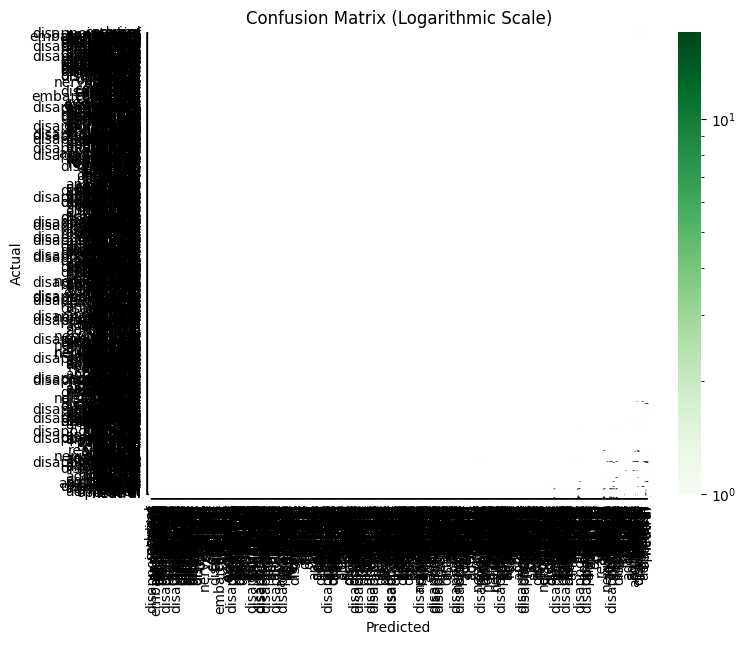

In [58]:
cm = confusion_matrix(y_test, y_pred_log, labels=emotion_labels)

plt.figure(figsize=(8, 6))

# Use LogNorm to apply a logarithmic scale to the color distribution
sns.heatmap(cm, 
            annot=True, 
            fmt='d', 
            cmap='Greens', 
            xticklabels=emotion_labels, 
            yticklabels=emotion_labels,
            norm=mcolors.LogNorm(vmin=1, vmax=cm.max()))

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Logarithmic Scale)")
plt.show()